# EDA
### The purpose of this stage is to understand the relationship of each variale with outcome varibale using graphs and generate useful information for the client.
### This will also lead to techincal inputs for further processing

### Only samples techniques of EDA are provided

In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
import pydotplus
from matplotlib import rcParams
import seaborn as sb

from collections import Counter

In [24]:
df1 = pd.read_csv('2_SalesEffect_Cleaned.csv')
df1.head()

,c_Product_ID,c_Source,c_Sales_Agent,c_Location,c_Delivery_Mode,y_Status
0,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,1_Potential
1,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,1_Potential
2,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,1_Potential
3,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,0_NotPotential
4,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,1_Potential


In [25]:
# Create All lists
AllColumns = ['c_Product_ID', 'c_Source','c_Sales_Agent', 
              'c_Location', 'c_Delivery_Mode', 'y_Status']

# No Continuous Columns
ConVarList=[]

CatVarList = ['c_Product_ID', 'c_Source','c_Sales_Agent', 
              'c_Location', 'c_Delivery_Mode']

OutcomeVar=['y_Status']



# Checking normality of varibales - to understand the requirment of tranforming the varibales

### All are categorical variables so normality related test is not required

In [26]:
# Check distribution of continous variables 
#ConVarStats = df1[ConVarList].agg(['skew','kurtosis','std','mean','min','median','max'])
#print(ConVarStats)

In [27]:
# The P value > 0.05 for the varible to be normal (In this test null hypothesis is reverse of usual. 
#None of the variables are normal. We can look at 
#log transforming those varibales before being fed into the algorithms
# None are normal

# All columns are categorical. so this text is not reqired

#for i in ConVarList:
#    print(i,stats.shapiro(df1[[i]]))

# Box plot of all the varibles - to analyse the possibility of scaling

### Not required as all columns are categorical

In [28]:
#df1[ConVarList].describe()

In [29]:
# the magnitude of variations between varibales is  huge. Variables have to be scaled.
#rcParams['figure.figsize'] =10,5
#df1[ConVarList].boxplot()

# Basic Pie chart of outcome variable

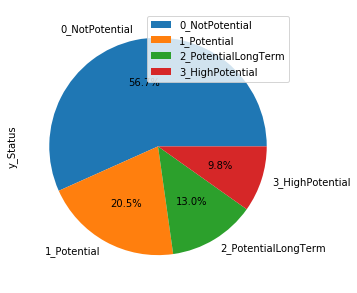

In [40]:
# 56.7 % of the leads are not potential leads
'''
'0_NotPotential': 3727,
'1_Potential': 1350,
'2_PotentialLongTerm',
'3_HighPotential': 852
'''
rcParams['figure.figsize'] =10,5
df1.y_Status.value_counts(sort=True).plot.pie(labels=["0_NotPotential",'1_Potential','2_PotentialLongTerm','3_HighPotential']
                                               ,legend = True, autopct='%1.1f%%',shadow=False)
plt.show()

In [12]:
#Look actual nos
Counter(df1.y_Status)

Counter({1: 1350, 0: 3727, 3: 852, 2: 645})

# Assessing Continuous Varibales
## Use this techinique to analyse each continuous predictor with outcome variable

### No continuous columns are present in this case

In [13]:
#df1['XXX'].describe()

In [31]:
# Converting age into into Bins( 50 Days each). Check the frequency of each bin
#custom_bucket_array = np.linspace(15, 90, 16)
#df1['XXX'] = pd.cut(df1['XXX'], custom_bucket_array)

In [14]:
# Write your observation from analysis
#Crosstab_AL = pd.crosstab(df1.q_age_bin, df1.y_salary_band)
#print(Crosstab_AL)
#Crosstab_AL.plot(kind='barh', stacked=False, grid=True, title="Age Vs Salary")

In [15]:
# Delete the temporary columns created
#DeletColList = ['q_age_bin']

# Delete the listed columns / features
#df1.drop(DeletColList, inplace=True, axis=1)

#Index the columns to group catagorical, continous and outcome separately
#df1=df1.sort_index(axis=1)


#df1.head()

# Analyse Proudct with Lead Category
## Use this techinique to analyse each catagorical predictor with outcome variable

y_Status      0_NotPotential  1_Potential  2_PotentialLongTerm  \
c_Product_ID                                                     
0.0                   0.0152       0.0000               0.0000   
1.0                   1.0192       0.2130               0.0761   
2.0                   0.3194       0.1217               0.0761   
3.0                   0.0456       0.0304               0.0304   
5.0                   3.8029       1.0192               0.5324   
6.0                   0.0608       0.0304               0.0152   
7.0                   0.0152       0.0000               0.0000   
8.0                   0.0456       0.0000               0.0152   
9.0                   6.2519       3.1488               1.5059   
10.0                  0.8366       0.6693               0.2282   
11.0                  0.1217       0.0456               0.0000   
12.0                  0.2586       0.0913               0.0304   
13.0                  0.0456       0.0000               0.0000   
14.0      

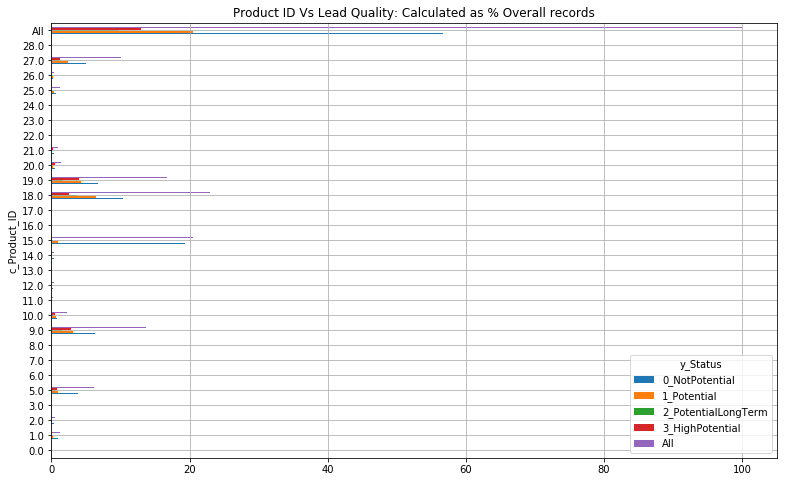

In [44]:
# Write your observation. Add another variable to get a groupby affect of frequencies e.g. [df1.c_workclass,df1.c_education]
#product Id - 5,9,15,18,27 are producting highest no. of "not potential" leads
#product Id - 9,18,19 produce high potental leads
#product Id - 9,18,19,27 produce good no of potential leads
# if there is a good lead qulification prcoess, then "not potential" leads can be reduced
# Other producs are not generating adquate no of leads

rcParams['figure.figsize'] =13,8
Crosstab_Cat = pd.crosstab([df1.c_Product_ID], df1.y_Status,normalize = 'all',margins=True).round(6)*100
print(Crosstab_Cat)
Crosstab_Cat.plot(kind='barh', stacked=False, grid=True,title="Product ID Vs Lead Quality: Calculated as % Overall records")

# Analyse Source with Lead Category

y_Status                       0_NotPotential  1_Potential  \
c_Source                                                     
By Recommendation                      0.0456       0.0913   
CRM form                               0.2130       0.0608   
Call                                  21.2352       6.9973   
Campaign                               0.1673       0.0304   
Customer Referral                      0.2282       0.5476   
E-Mail Message                         0.0000       0.0152   
E-mail Campaign                        0.1065       0.0000   
Existing Client                        0.0304       0.1673   
Existing Customer                      0.0304       0.0761   
Just Dial                              0.6085       0.0456   
Live Chat -PPC                         1.7949       0.6997   
Live Chat-Adwords Remarketing          0.0608       0.0304   
Live Chat-Blog                         2.0535       0.5172   
Live Chat-CPC                          0.4563       0.1065   
Live Cha

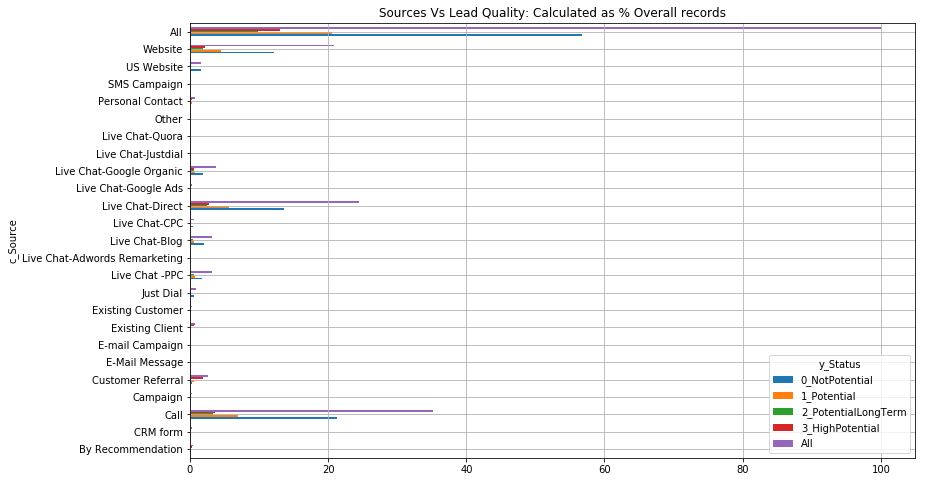

In [45]:
# Write your observation. Add another variable to get a groupby affect of frequencies e.g. [df1.c_workclass,df1.c_education]
# Calls, live chat and web produce hight no of leads across all categories ~90% of all leads
# We should look at reducting spending on most of other channels
rcParams['figure.figsize'] =13,8
Crosstab_Cat = pd.crosstab([df1.c_Source], df1.y_Status,normalize = 'all',margins=True).round(6)*100
print(Crosstab_Cat)
Crosstab_Cat.plot(kind='barh', stacked=False, grid=True,title="Sources Vs Lead Quality: Calculated as % Overall records")

#  Analyse Sales Agent with Lead Category

y_Status           0_NotPotential  1_Potential  2_PotentialLongTerm  \
c_Sales_Agent                                                         
Sales-Agent-10             0.0761       0.0000               0.0000   
Sales-Agent-11            10.7089       3.9093               1.8254   
Sales-Agent-12             2.8445       0.0000               0.0000   
Sales-Agent-2              3.2705       0.0152               1.6885   
Sales-Agent-3              6.5713       1.1561               1.2169   
Sales-Agent-4             11.5455       5.2175               1.0952   
Sales-Agent-5             10.9066       2.1448               1.3995   
Sales-Agent-6              0.8214       0.0000               0.3499   
Sales-Agent-7              5.5522       2.3426               1.1561   
Sales-Agent-8              0.3042       0.0761               0.0304   
Sales-Agent-9              4.0462       5.6434               1.0496   
Sales-Agent-Other          0.0456       0.0304               0.0000   
All   

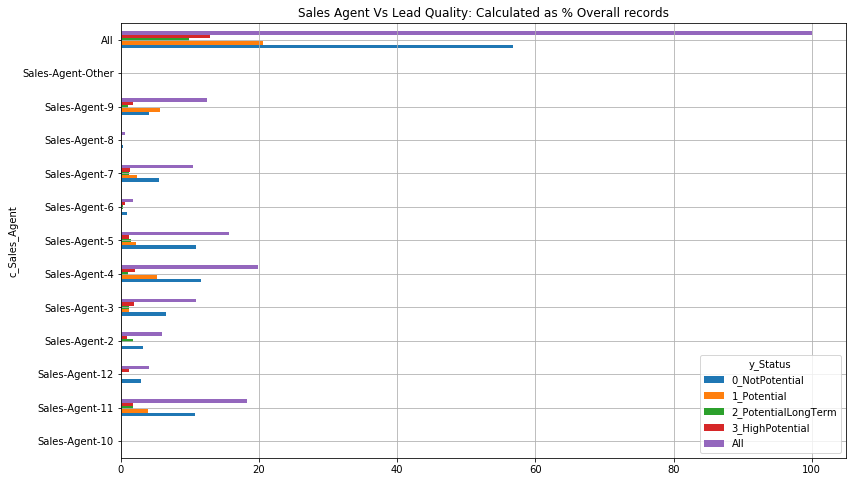

In [46]:
# Write your observation. Add another variable to get a groupby affect of frequencies e.g. [df1.c_workclass,df1.c_education]
# Sales Agent 3,4,5,7,9,11 produce hight leads
# Lots of notPotential leads generated - 56%
rcParams['figure.figsize'] =13,8
Crosstab_Cat = pd.crosstab([df1.c_Sales_Agent], df1.y_Status,normalize = 'all',margins=True).round(6)*100
print(Crosstab_Cat)
Crosstab_Cat.plot(kind='barh', stacked=False, grid=True,title="Sales Agent Vs Lead Quality: Calculated as % Overall records")

# Analyse Delivery Mode with Lead Category

y_Status         0_NotPotential  1_Potential  2_PotentialLongTerm  \
c_Delivery_Mode                                                     
Mode-1                  17.2802       8.5488               5.0654   
Mode-2                   0.0304       0.0456               0.0000   
Mode-3                  11.1348       5.8868               2.0992   
Mode-4                   0.5476       0.3042               0.1217   
Mode-5                  27.7000       5.7499               2.5251   
All                     56.6930      20.5354               9.8114   

y_Status         3_HighPotential       All  
c_Delivery_Mode                             
Mode-1                    6.6322   37.5266  
Mode-2                    0.0456    0.1217  
Mode-3                    2.6012   21.7219  
Mode-4                    0.8062    1.7797  
Mode-5                    2.8750   38.8500  
All                      12.9601  100.0000  


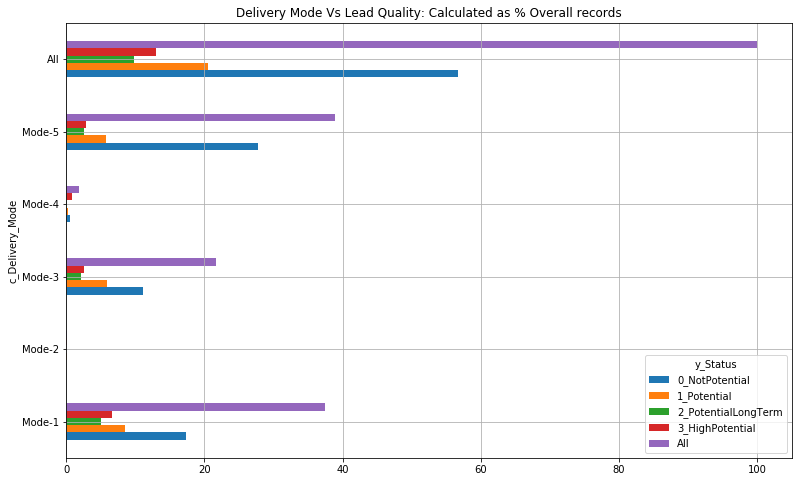

In [47]:
# Write your observation. Add another variable to get a groupby affect of frequencies e.g. [df1.c_workclass,df1.c_education]
# Delivery mode 1,3,5 are best performers across all categories
# Modes 2,4 should be relooked from spending standpoint
rcParams['figure.figsize'] =13,8
Crosstab_Cat = pd.crosstab([df1.c_Delivery_Mode], df1.y_Status,normalize = 'all',margins=True).round(6)*100
print(Crosstab_Cat)
Crosstab_Cat.plot(kind='barh', stacked=False, grid=True,title="Delivery Mode Vs Lead Quality: Calculated as % Overall records")

#  Analyse Location with Lead Category 

y_Status         0_NotPotential  1_Potential  2_PotentialLongTerm  \
c_Location                                                          
AUSTRALIA                0.1369       0.0761               0.0000   
Bangalore               10.9218       7.4232               4.7308   
Chennai                  5.4305       3.8789               1.3842   
Delhi                    3.6812       1.2017               0.6997   
EUROPE                   0.0000       0.0456               0.0000   
Howrah                   0.0152       0.0000               0.0000   
Hyderabad                3.8485       1.5516               0.7454   
Kolkata                  0.5020       0.1217               0.0456   
Malaysia                 0.0000       0.0152               0.0000   
Mumbai                   3.0879       1.3234               0.4259   
Other Locations         26.4679       3.8789               1.3842   
Pune                     1.1865       0.2738               0.2282   
Singapore                0.0761   

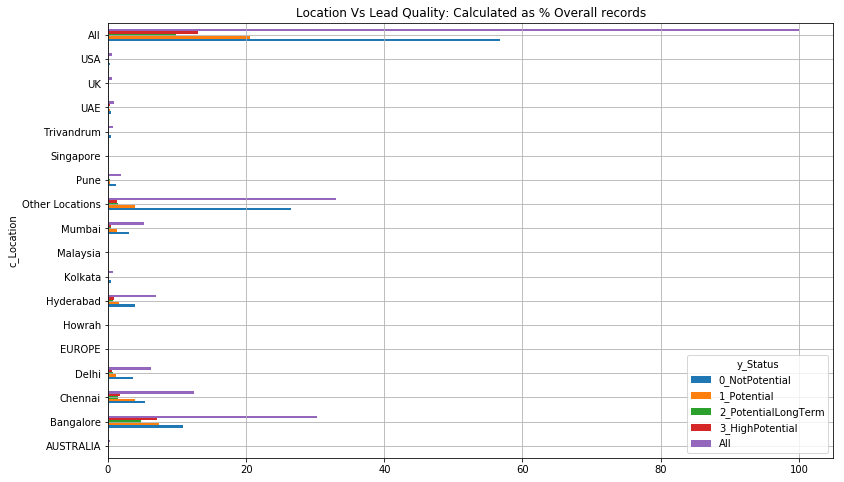

In [53]:
# Write your observation. Add another variable to get a groupby affect of frequencies e.g. [df1.c_workclass,df1.c_education]
# bangalore and chennai produce highest leads
# Most of high potential or converts - 9% are from these location out of 13% Convers
# Other lcations produce highe no of Not potential leads with very leadd high pot or converts
rcParams['figure.figsize'] =13,8
Crosstab_Cat = pd.crosstab([df1.c_Location], df1.y_Status,normalize = 'all',margins=True).round(6)*100
print(Crosstab_Cat)
Crosstab_Cat.plot(kind='barh', stacked=False, grid=True,title="Location Vs Lead Quality: Calculated as % Overall records")

y_Status                           0_NotPotential  1_Potential  \
c_Sales_Agent     c_Delivery_Mode                                
Sales-Agent-10    Mode-1                   0.0304       0.0000   
                  Mode-4                   0.0304       0.0000   
                  Mode-5                   0.0152       0.0000   
Sales-Agent-11    Mode-1                   1.8254       0.7454   
                  Mode-3                   1.4603       0.7910   
                  Mode-4                   0.1065       0.0000   
                  Mode-5                   7.3167       2.3730   
Sales-Agent-12    Mode-1                   1.7797       0.0000   
                  Mode-3                   0.1065       0.0000   
                  Mode-4                   0.0000       0.0000   
                  Mode-5                   0.9583       0.0000   
Sales-Agent-2     Mode-1                   1.7341       0.0152   
                  Mode-3                   0.6389       0.0000   
          

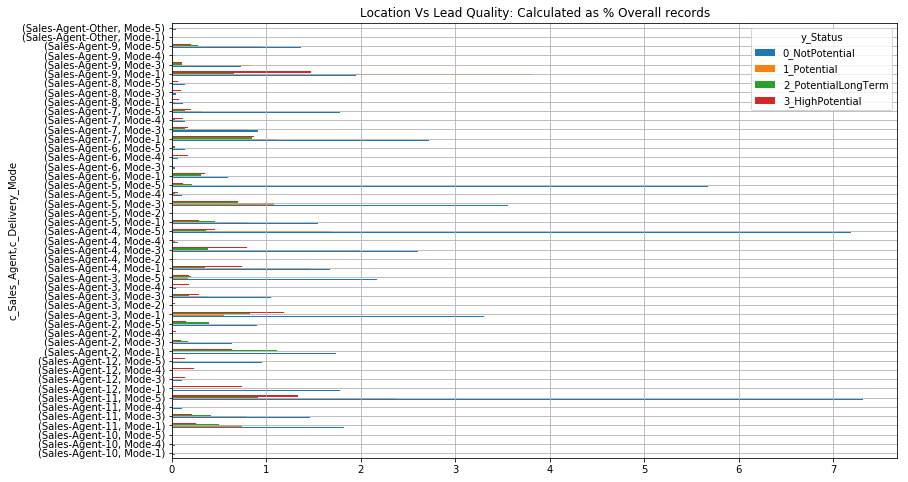

In [59]:
rcParams['figure.figsize'] =13,8
Crosstab_Cat = pd.crosstab([df1.c_Sales_Agent,df1.c_Delivery_Mode], df1.y_Status,normalize = 'all').round(6)*100
print(Crosstab_Cat)
Crosstab_Cat.plot(kind='barh', stacked=False, grid=True,title="Location Vs Lead Quality: Calculated as % Overall records")